In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
    

In [2]:
df = pd.read_excel('mall.xlsx')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop('CustomerID',axis=1,inplace=True)

In [5]:
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'},inplace=True)

In [6]:
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
df.nunique()

Gender     2
Age       51
Income    64
Score     84
dtype: int64

# Visualization

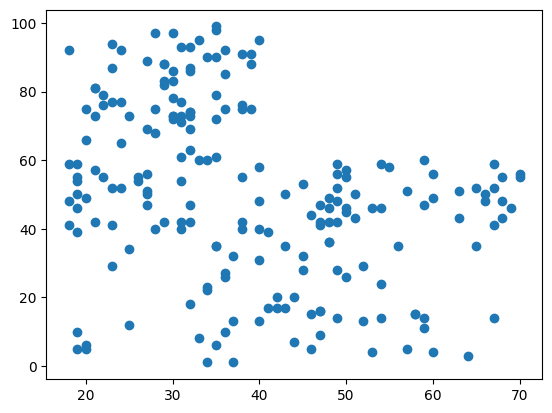

In [8]:
plt.scatter(df.Age,df.Score)

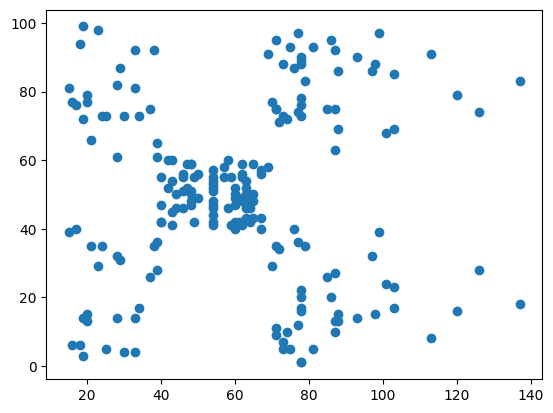

In [9]:
plt.scatter(df.Income,df.Score)

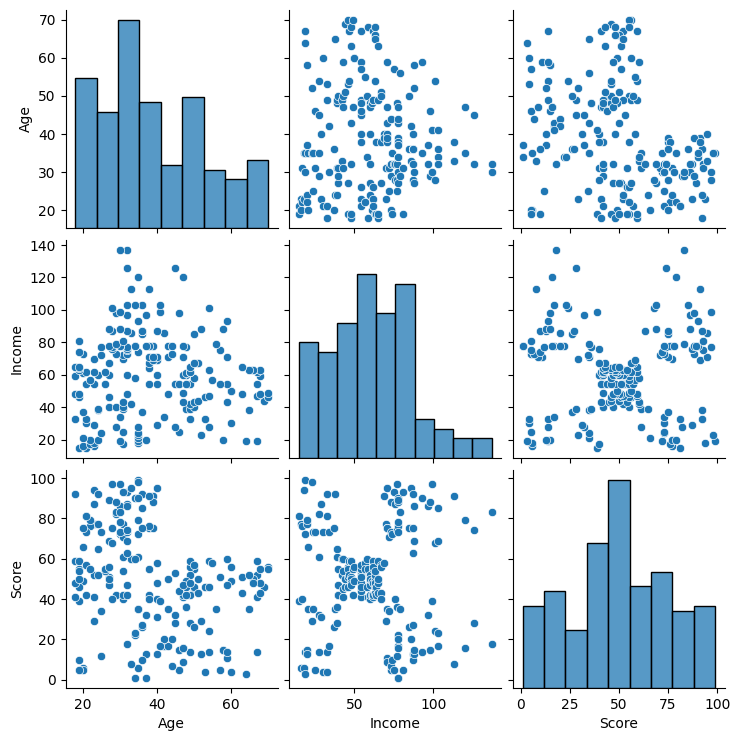

In [10]:
sns.pairplot(df[['Age','Income','Score']]) #nijeder jonno histplot, onno keu ashle scatterplot

In [11]:
import sklearn.cluster as cluster

In [12]:
kmeans = cluster.KMeans()

In [13]:
pred = kmeans.fit_predict(df[['Income','Score']])

In [14]:
pred

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 4, 2, 4, 4,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 7, 7, 4, 4, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 0, 1, 7, 1, 0, 1, 0, 1,
       7, 1, 0, 1, 0, 1, 0, 1, 0, 1, 7, 1, 0, 1, 7, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 7, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6,
       5, 6], dtype=int32)

In [15]:
df2 = df.copy()

In [16]:
df2.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [17]:
df2['Predicted'] = pred

In [18]:
df2.head()

,Gender,Age,Income,Score,Predicted
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,3
3,Female,23,16,77,2
4,Female,31,17,40,3


In [19]:
centers = kmeans.cluster_centers_
centers

array([[ 79.73913043,  13.39130435],
       [ 78.55172414,  82.17241379],
       [ 25.0952381 ,  80.04761905],
       [ 25.14285714,  19.52380952],
       [ 46.56097561,  50.95121951],
       [109.7       ,  22.        ],
       [109.7       ,  82.        ],
       [ 63.15555556,  47.31111111]])

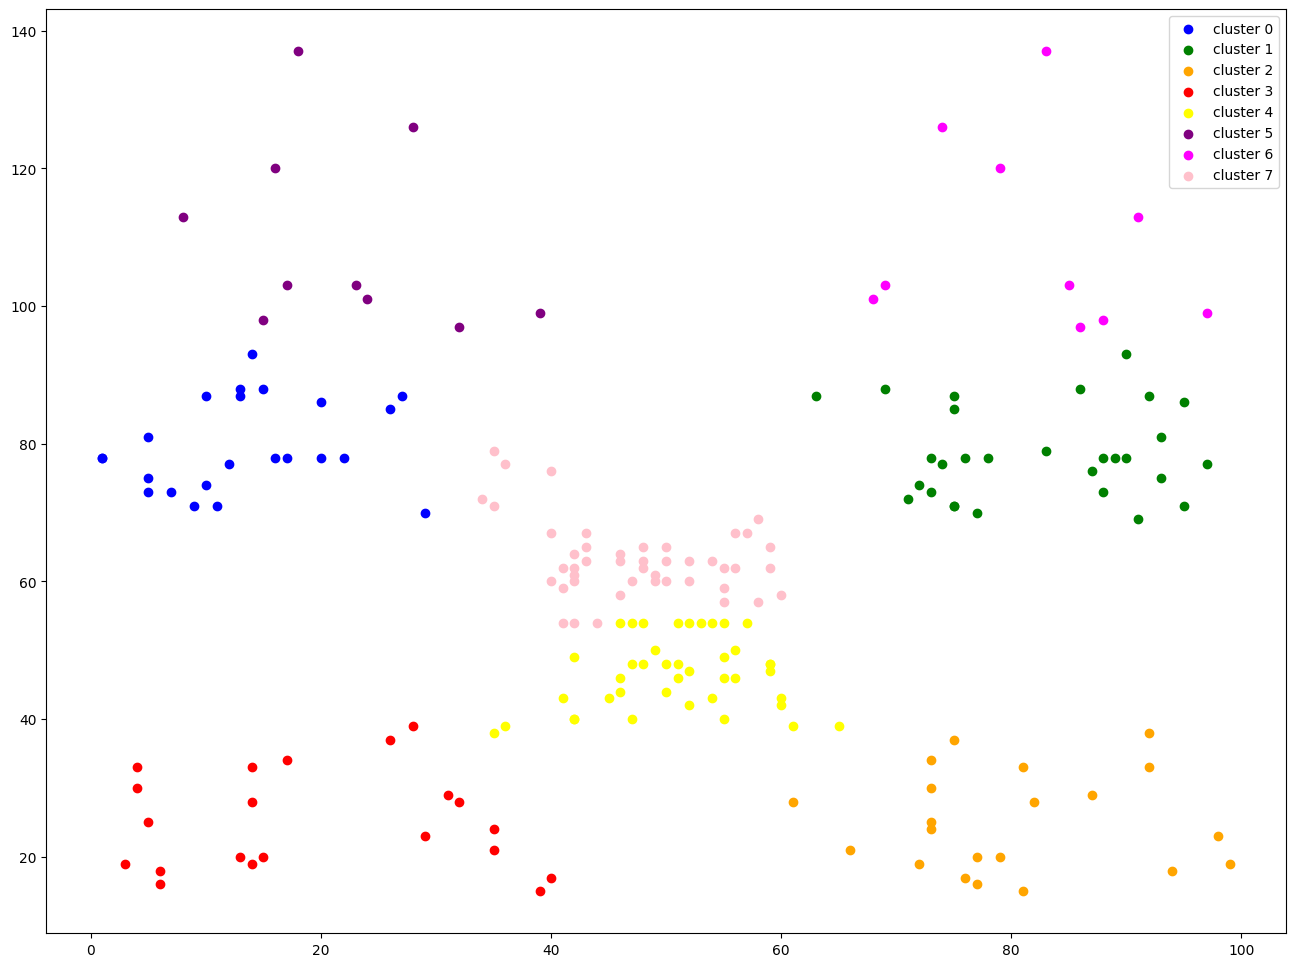

In [20]:
df0 = df2[df2.Predicted==0]
df1 = df2[df2.Predicted==1]
df8 = df2[df2.Predicted==2]
df3 = df2[df2.Predicted==3]
df4 = df2[df2.Predicted==4]
df5 = df2[df2.Predicted==5]
df6 = df2[df2.Predicted==6]
df7 = df2[df2.Predicted==7]


plt.figure(figsize=(16,12))

plt.scatter(df0['Score'],df0['Income'],color='blue',label='cluster 0')
plt.scatter(df1['Score'],df1['Income'],color='green',label='cluster 1')
plt.scatter(df8['Score'],df8['Income'],color='orange',label='cluster 2')
plt.scatter(df3['Score'],df3['Income'],color='red',label='cluster 3')
plt.scatter(df4['Score'],df4['Income'],color='yellow',label='cluster 4')
plt.scatter(df5['Score'],df5['Income'],color='purple',label='cluster 5')
plt.scatter(df6['Score'],df6['Income'],color='fuchsia',label='cluster 6')
plt.scatter(df7['Score'],df7['Income'],color='pink',label='cluster 7')

plt.legend()


In [21]:
df0.head(7)

,Gender,Age,Income,Score,Predicted
124,Female,23,70,29,0
128,Male,59,71,11,0
130,Male,47,71,9,0
134,Male,20,73,5,0
136,Female,44,73,7,0
138,Male,19,74,10,0
140,Female,57,75,5,0


In [22]:
df1.head()

,Gender,Age,Income,Score,Predicted
123,Male,39,69,91,1
125,Female,31,70,77,1
127,Male,40,71,95,1
129,Male,38,71,75,1
131,Male,39,71,75,1


# Elbow Method

In [23]:
from sklearn.cluster import KMeans

In [24]:
wcss = []

In [25]:
cluster = range(1,15)

for k in cluster:
    kmean = KMeans(n_clusters=k)
    kmean.fit(df[['Income','Score']])
    wcss.append(kmean.inertia_)

In [26]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.814510710006,
 30241.34361793659,
 25011.92025547377,
 22874.05534759358,
 19710.0302716608,
 17586.63244734051,
 16049.714149902386,
 14464.52441483248,
 13025.035117823352]

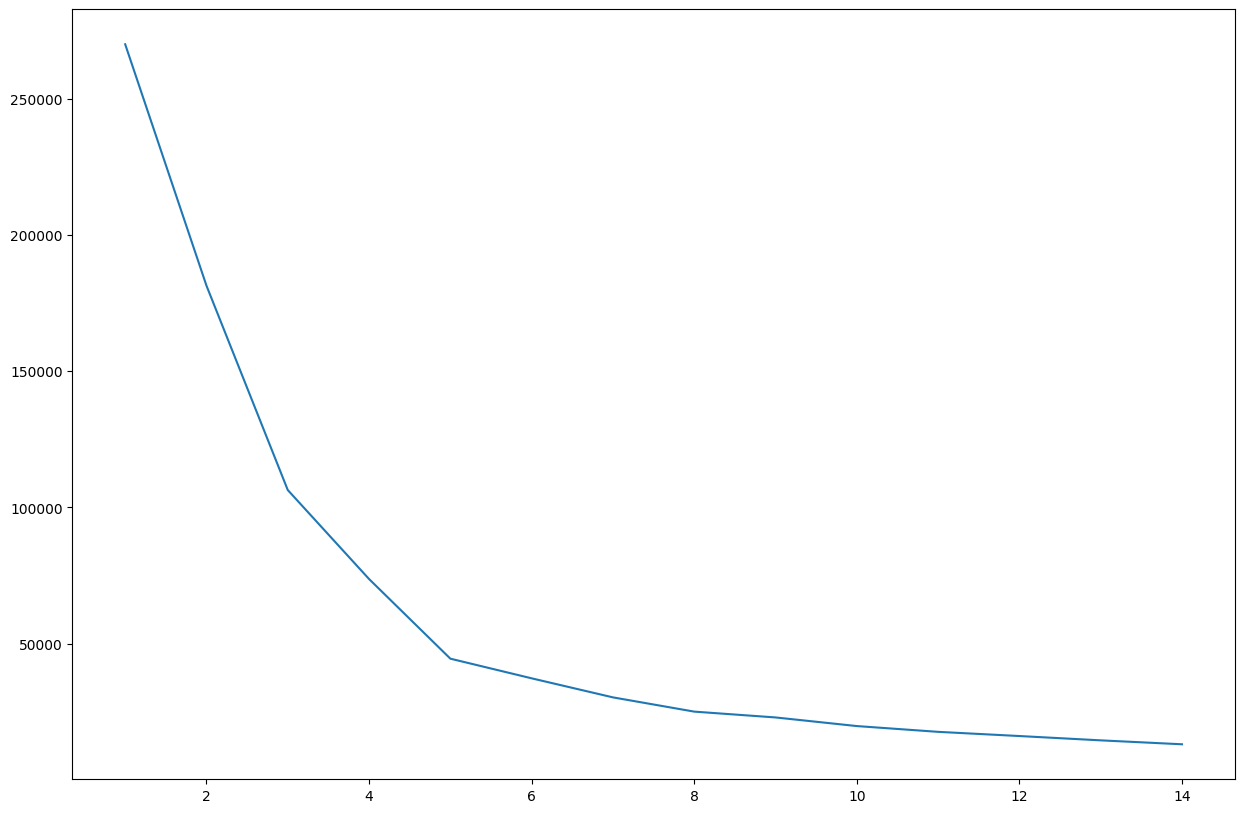

In [27]:
plt.figure(figsize=(15,10))
plt.plot(cluster,wcss)

In [28]:
!pip3 install kneed


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip


In [29]:
from kneed import KneeLocator

In [30]:
kn = KneeLocator(cluster,wcss,direction='decreasing',curve='convex')

In [31]:
kn

In [32]:
print('optimal number of cluster is: ',kn.knee)

optimal number of cluster is:  5


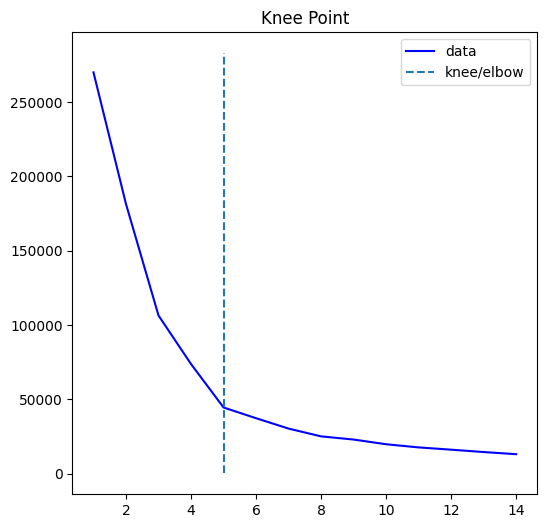

In [33]:
kn.plot_knee()

# After select best K

In [34]:
import sklearn.cluster as cluster

In [35]:
kmeans = cluster.KMeans(n_clusters=5)

In [36]:
predicted = kmeans.fit_predict(df[['Income','Score']])

In [37]:
predicted

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0,
       1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [38]:
df['Predicted'] = predicted

In [39]:
df.head()

,Gender,Age,Income,Score,Predicted
0,Male,19,15,39,1
1,Male,21,15,81,3
2,Female,20,16,6,1
3,Female,23,16,77,3
4,Female,31,17,40,1


In [40]:
center2 = kmeans.cluster_centers_

In [41]:
center2

array([[55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571]])

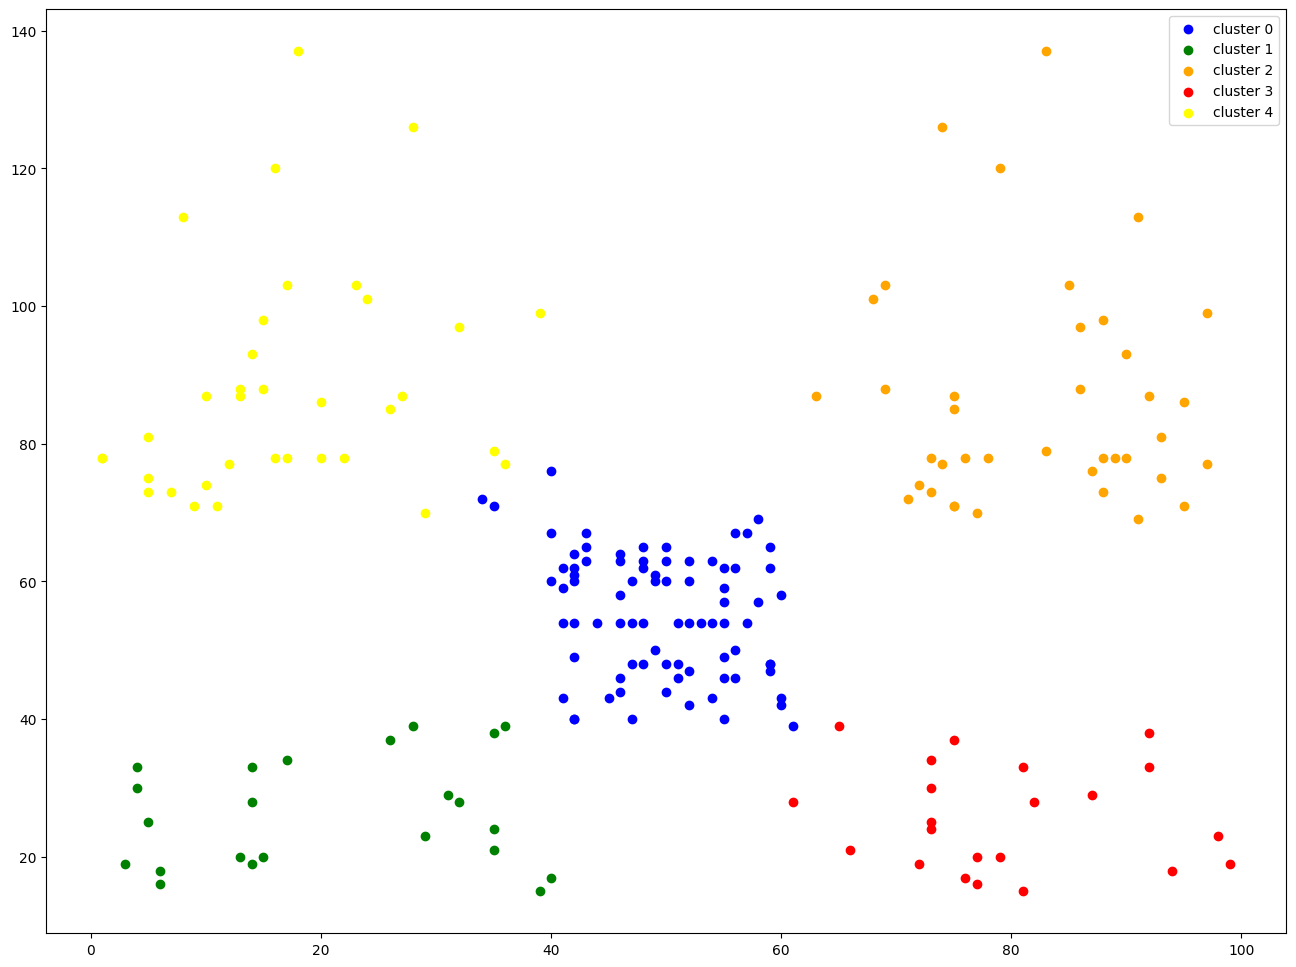

In [42]:
df0 = df[df.Predicted==0]
df1 = df[df.Predicted==1]
df2 = df[df.Predicted==2]
df3 = df[df.Predicted==3]
df4 = df[df.Predicted==4]



plt.figure(figsize=(16,12))

plt.scatter(df0['Score'],df0['Income'],color='blue',label='cluster 0')
plt.scatter(df1['Score'],df1['Income'],color='green',label='cluster 1')
plt.scatter(df2['Score'],df2['Income'],color='orange',label='cluster 2')
plt.scatter(df3['Score'],df3['Income'],color='red',label='cluster 3')
plt.scatter(df4['Score'],df4['Income'],color='yellow',label='cluster 4')

plt.legend()